# Discrete SIR model
[colab](https://colab.research.google.com/drive/1OLmqVknrlzFhHWTYyMnxRVpGbKTUf46u?usp=sharing) 

In [ ]:
import numpy as np
import random

# Discrete SIR simulation
def run_computational_SIR(steps, N, beta, alpha):

  # initialize
  I = 1 #patient zero
  R = 0 #recovered
  S = N-I-R #susceptible

  # observe
  history = []

  # update
  for step in range(steps):
    #variables to update
    next_S = S
    next_I = I
    next_R = R

    ##simulate the change in a computational model
    #loop over possible infections
    #for dummy_s in range(S):
    #  for dummy_i in range(I):
    #    if np.random.random(1)<beta:
    #      next_S -= 1
    #      next_I += 1
    #      break
    #for dummy_i in range(I):
    #  if np.random.random(1)<alpha:
    #    next_I -= 1
    #    next_R += 1

    p_inf = 1-(1-beta)**I
    new_I = np.random.binomial(S,p_inf)
    new_R = np.random.binomial(I,alpha)
    next_S -= new_I
    next_I += new_I - new_R
    next_R += new_R

    #update variables
    S = next_S
    I = next_I
    R = next_R
    history.append((S,I,R))
    if I==0:
      break;

  St,It,Rt = map(np.array, zip(*history))
  return(St,It,Rt)

In [ ]:
import numpy as np
import random

# Discrete FIRE simulation
def run_computational_fire(steps, N, beta, gamma):

  # initialize
  F = 0 #patient zero
  T = N-F #susceptible

  # observe
  history = []

  # update
  for step in range(steps):
    #variables to update
    next_F = F
    next_T = T

    p_inf = 1-(1-gamma)*(1-beta)**F
    new_F = np.random.binomial(T,p_inf)
    new_T = np.random.binomial(F,1.0)
    next_F += new_F - new_T
    next_T += new_T - new_F

    #update variables
    F = next_F
    T = next_T
    history.append((F,T))

  Ft,Tt = map(np.array, zip(*history))
  return(Ft,Tt)

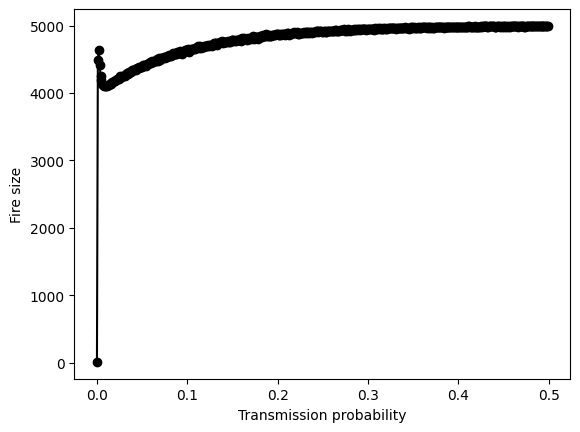

In [ ]:
#@title Statistical analysis of the SIR model { run: "auto" }

import matplotlib.pyplot as plt
from scipy import ndimage
from matplotlib import cm

from IPython import display
from time import sleep

# Parameters
N = 5300 #@param {type:"slider", min:100, max:20000, step:100}
steps = 101 #@param {type:"slider", min:1, max:1000, step:1}
# probabilities
gamma = 0.001 #@param {type:"slider", min:0, max:1, step:0.001}
# statistics
repetitions = 100 #@param {type:"slider", min:1, max:200, step:1}

#run model
beta_values = np.arange(0,0.5,0.001)
outbreak_sizes = np.empty(0)
for beta in beta_values:
  results = []
  for reps in range(repetitions):
    (Ft,Tt) = run_computational_fire(steps, N, beta, gamma)
    results.append(np.sum(Ft[-10:-1])/10)
  outbreak_sizes = np.append(outbreak_sizes, sum(results) / len(results))

#plot
plt.plot(beta_values, outbreak_sizes, marker ='o', color='k')
plt.xlabel("Transmission probability")
plt.ylabel("Fire size")
plt.show()




In [ ]:
import numpy as np
import random

# Discrete SIR calculation
def run_mathematical_SIR(steps, N, beta, alpha):

  # initialize
  I = 1 #patient zero
  R = 0 #recovered
  S = N-I-R #susceptible

  # observe
  history = []

  # update
  for step in range(steps):
    #variables to update
    next_S = S
    next_I = I
    next_R = R

    ##calculate the change in a mathematical model
    #next_S -= beta*S*I
    #next_I += beta*S*I - alpha*I
    #next_R += alpha*I

    next_S -= S*(1-(1-beta)**I)
    next_I += S*(1-(1-beta)**I) - alpha*I
    next_R += alpha*I

    #update variables
    S = next_S
    I = next_I
    R = next_R
    history.append((S,I,R))

  St,It,Rt = map(np.array, zip(*history))
  return(St,It,Rt)

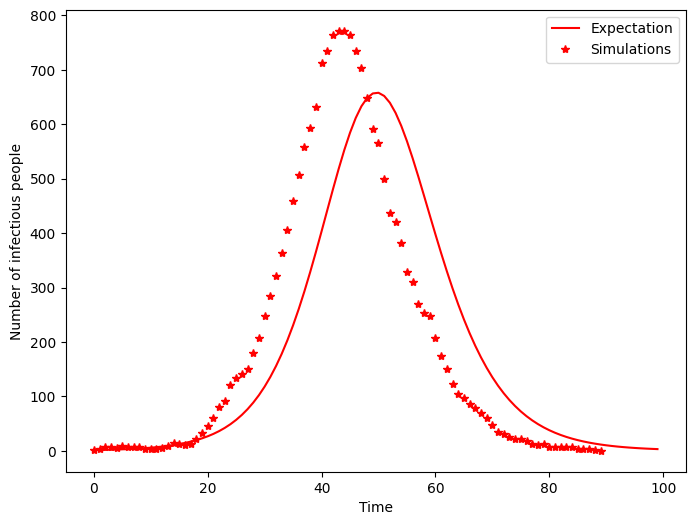

In [ ]:
import matplotlib.pyplot as plt

#Run a simulation
(S_c,I_c,R_c) = run_computational_SIR(100, 10000, 0.00005, 0.33)
#Calculate expectation
(S,I,R) = run_mathematical_SIR(100, 10000, 0.00005, 0.33)

# Plot the results
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(np.arange(0,len(I)), I, 'r', linestyle ='-',  label='Expectation')
ax.plot(np.arange(0,len(I_c)), I_c, 'r', marker ='*', linewidth=0, label='Simulations')
plt.ylabel('Number of infectious people')
plt.xlabel('Time')
ax.legend()


## Parameter sweep for transmission probability

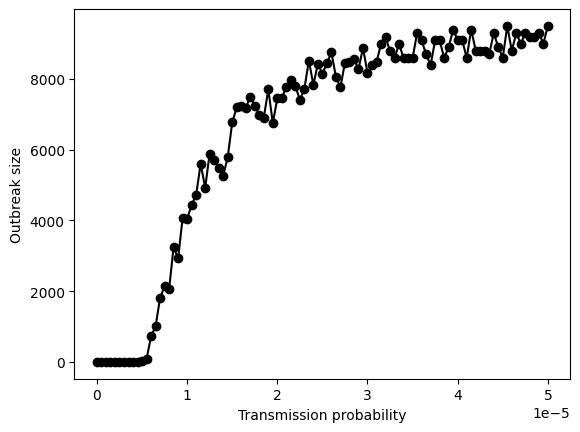

In [ ]:
#@title Statistical analysis of the SIR model { run: "auto" }

import matplotlib.pyplot as plt
from scipy import ndimage
from matplotlib import cm

from IPython import display
from time import sleep

# Parameters
N = 10000 #@param {type:"slider", min:100, max:20000, step:100}
steps = 1000 #@param {type:"slider", min:1, max:1000, step:1}
# probabilities
alpha = 0.05 #@param {type:"slider", min:0, max:1, step:0.001}
# statistics
repetitions = 100 #@param {type:"slider", min:1, max:200, step:1}

#run model
beta_values = np.arange(0,0.5/N,0.005/N)
outbreak_sizes = np.empty(0)
for beta in beta_values:
  results = []
  for reps in range(repetitions):
    (St,It,Rt) = run_computational_SIR(steps, N, beta, alpha)
    results.append(Rt[-1])
  outbreak_sizes = np.append(outbreak_sizes, sum(results) / len(results))

#plot
plt.plot(beta_values, outbreak_sizes, marker ='o', color='k')
plt.xlabel("Transmission probability")
plt.ylabel("Outbreak size")
plt.show()




## Distributions of outputs

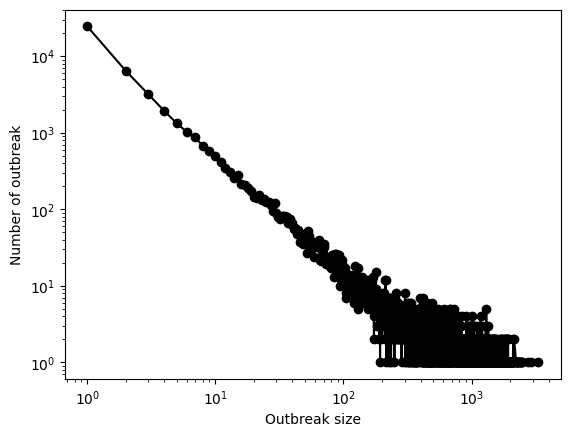

In [ ]:
#@title Statistical analysis of the SIR model { run: "auto" }

import matplotlib.pyplot as plt
from scipy import ndimage
from matplotlib import cm

from IPython import display
from time import sleep

# Parameters
N = 20000 #@param {type:"slider", min:100, max:20000, step:100}
steps = 1000 #@param {type:"slider", min:1, max:1000, step:1}
# probabilities
beta = 0.0000025 #@param {type:"slider", min:0, max:0.00005, step:0.000001}
alpha = 0.05 #@param {type:"slider", min:0, max:1, step:0.001}
# statistics
repetitions = 49987 #@param {type:"slider", min:1, max:100000, step:1}
results = np.zeros(repetitions)

#run model
for reps in range(repetitions):
  (St,It,Rt) = run_computational_SIR(steps, N, beta, alpha)
  results[reps] = Rt[-1]

#plot
unique, counts = np.unique(results, return_counts=True)
plt.loglog(np.divide(unique,1), np.divide(counts,1), marker ='o', color='k')
plt.xlabel("Outbreak size")
plt.ylabel("Number of outbreak")
plt.show()


